# Introduction


Ygen

Motivation for the project and intro to image tracking (YGEN)

Visual object tracking is an important research direction in computer vision, and it has a wide range of applications, such as: video surveillance, human-computer interaction, unmanned driving, etc. Comparing with many others compute visual missions, for example, object detection, they have a lot of difference. Firstly, object detection can not detect every object in the world, where the task setting of the detector at the beginning is essentially different from that of the tracker. Therefore, even if the two can be replaced under certain circumstances, the replacement can only be a temporary strategy, where there are still many mismatches in the task of detection and tracking. In essence, the tracker can fully consider the spatio-temporal information, making it more suitable for the task of tracking any target in the video. Therefore, the reserach on tracking task is not only limited to tracking an object in video, but also includes how to model context, how to make better use of spatiotemporal information, how to express target model, how to update target model with time and so on. In short, target tracking is to establish the position relation of the object to be tracked in a continuous video sequence, and get the complete motion track of the object.

In the past two or three decades, visual object tracking technology has made great progress, especially in the past few years, the object tracking method based on deep learning has achieved satisfactory results, which makes a breakthrough in object tracking technology. In this blog, we are going to introduce, reproduce and have an in-depth investigation of one of the most famous object tracking paper, Learning to Track at 100 FPS with Deep Regression Networks [reference]. In this section, the motivation and introduction of object tracking are discussed. In Section 2, we mainly discuss the architecture of the paper [reference]. Furthermore, we also do the reproduction work and replace the pretrained network of the original paper by the latest pretrained network and evaluate and compare their performace with the original one in Section 3. In Section 4, we focus on the influence of different loss functions on neural networks. In Section 5, we combine the relatively good loss functions and the pretrained networks to see their combination performance. In Section 6, we give our conclusion about this blog.

# Architecture

(Aymar)

The goal of the network is to have as input the frames of a video, and after processing, it will output the location of the tracked object for each frame. The network will try to learn a relationship between appearance and motion. 

The network consists of two parrallel channels of 5 convolutional layers each, which are the 5 pretrained convolutional layers of AlexNet. They take as input the current (t) frame from whome we want to find it's bounding box and it's frame just before (t-1). Their output is a set of features that capture a high-level representation of the image. Then the outputs of the convolutional layers are concatenated and resized before passing through 3 fully connected layers. Their role is to compare the features from the target object to the features of the target object in the previous frame with the features of the target frame in the current frame. Finally the output consists of 4 values which represent the output bounding box of the current frame. 

When there are multiple objects on a frame, the model should receive some prior knowledge about what object to track. This is done by cropping the image around the tracked object and by adding some padding around the crop to give some contextual information. The current (t) and previous (t-1) frames are both cropped around the same coordinates at timestep (t-1). When testing the first image is being cropped around it's ground-truth bounding box. Then at each following timestep, the frame at time t is being cropped around the predicted bounding box of the previous frame (t-1). This allows good results when the bounding box is well located. But when the boudnign box looses the track of the object, there is no way, appart of randomly, to find the object back again. This is one of the major drawbacks of this method. Then another drawback is that when the motions are too big and too fast, the object might not find itself anymore in the next cropped frame. 



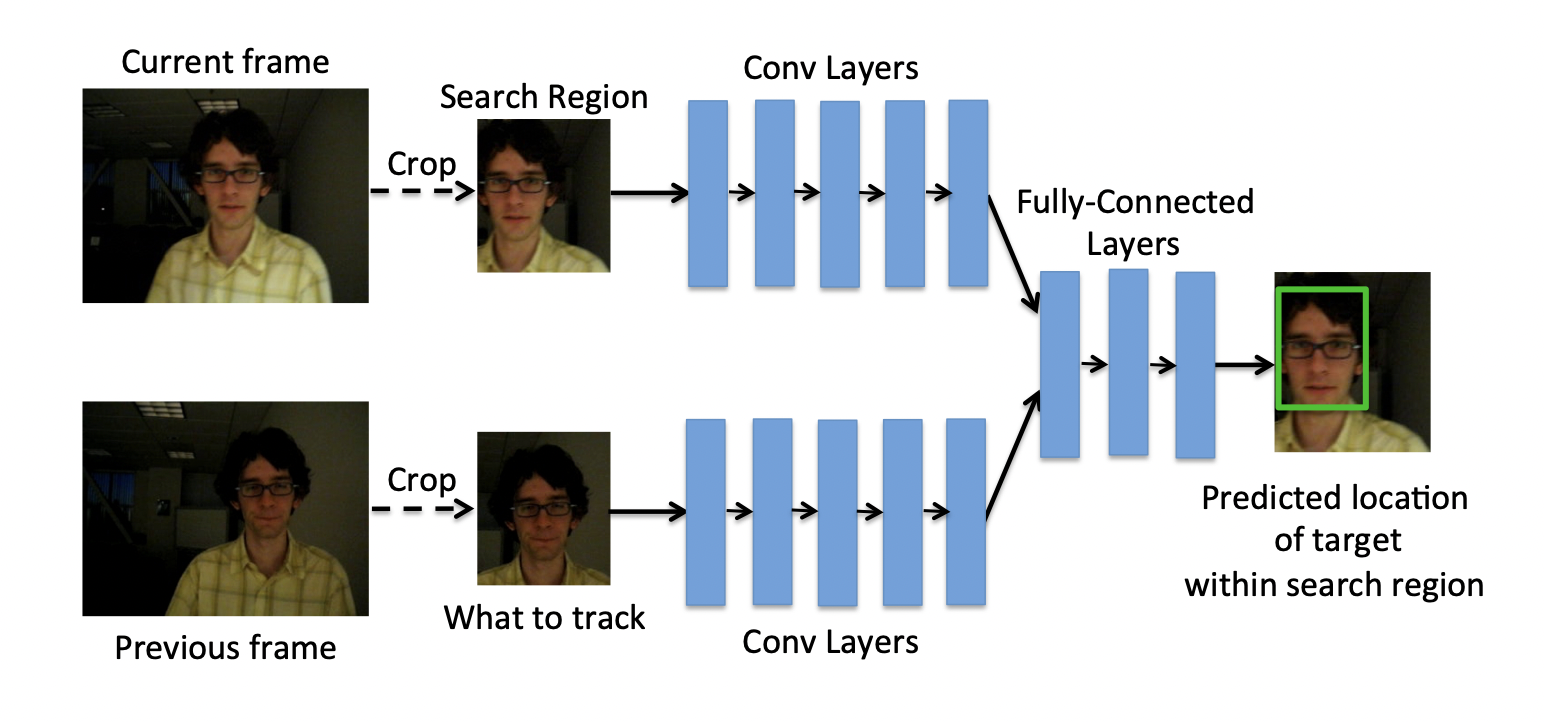

# Pretrained architectures


(Aymar)

One of the important things to notice with the paper is that it is written in 2016. Since then the computer vision field has improved a lot. The AlexNet has been released in 2012 with a poor accuracy of 79. Then the VGG-16 was proposed in 2014 with an much better results namely 90. The ResNet architecture was resleased in 2015 by Microsoft has accuracies going from 89 till 94. In 2018, the MobileNetV2 reached 90 and the Mnasnet0_5 reached 87. All those networks have different advantages and disadvantages. For example for the 3 first architectures, the focus was namely on having the best possible result on classification tasks. The MobileNet and MnasNet wanted to be integrated on mobile devices, they have then to be fast and small, while obtaining the best possible classification accuracies.

Several results were compared. The first one is the accuracy of the tracking, the IoU metric is used to compare the predicted bounding box with the ground truth one. And then an average of the IoU of the different frames is taken to make a comparison. A drawback of doing it like that is when the model looses the track of the object, it is then not possible anymore, only by chance, to get back to track the object again. This is why another metric is used to measure the quality of the fit, when it is actually tracking. This metric only averages the IoU of the frames that don't have a zero IoU. Both those metrics aren't very representative of the actual perfomances of the model, once they  loose track of the object. 

A second compared result was the speed at which the models were able to output a bounding box. Object tracking is used on videos, the difficult thing is to do object tracking in real time, and depending on the amount of frames per second the difficulty can increase significantly. The computation time per frame is measured approximately on a few tests. 

The following architectures have been trained on the ALOV300++ dataset, it is a 10GB dataset. It comprises 315 short videos of average 9 seconds, which in total represent 89364 annotated frames. The videos are mostly taken from youtube and are of 64 different types. 

The tests have been performed on the first 16 classes of the OTB dataset, version 2013.

In the rest of this chapter we will discuss what the effects are on the results, when the pretrained convolutional layers are changed. 

The following tests have been done on Google Colab PRO.


---





---

Firstly the results of the original paper are discussed. The original paper uses the pretrained **AlexNET**, in order to do feature extraction. For these tests the trained model of the paper is used. It has been trained on the ALOV300++ and the ILSVRC2014_DET_train dataset. The other models have only been trained on the ALOV300 since the other one was too heavy to manage (47GB). The output size of the alexnet is 256 * 6 * 6, after the mas pooling layer. The test results were the following:


*   Accuracy : 0,39
*   Accuracy with non-zero IoU: 0,49
*   Exectution time : 0.014 second/frame

Usually in the litterature it is assumed that object tracking performances are correctly tracking the image when the IoU is greater than 0.5, this means that the tracking performances are not exceptionnal compared to the state of the art. A second point to notice is that the paper claims it is capable to analyse 100 FPS, which isn't the case when we tested it, we obtained 71.4 FPS. The GPU that the paper used is a GTX 680 and the one Google Colab PRO used is a Tesla P100-PCIE-16GB. The Google colab's GPU should in theory be faster than the paper's GPU, this means the difference in GPU isn't be a reason for the difference. Another possibility is that google colab looses some time when accessing it's memory. Or the difference may be due to the difference in dataset used, the paper used the videos of the VOT 2014 tracking challenge and we used the OTB version 2013 dataset. 


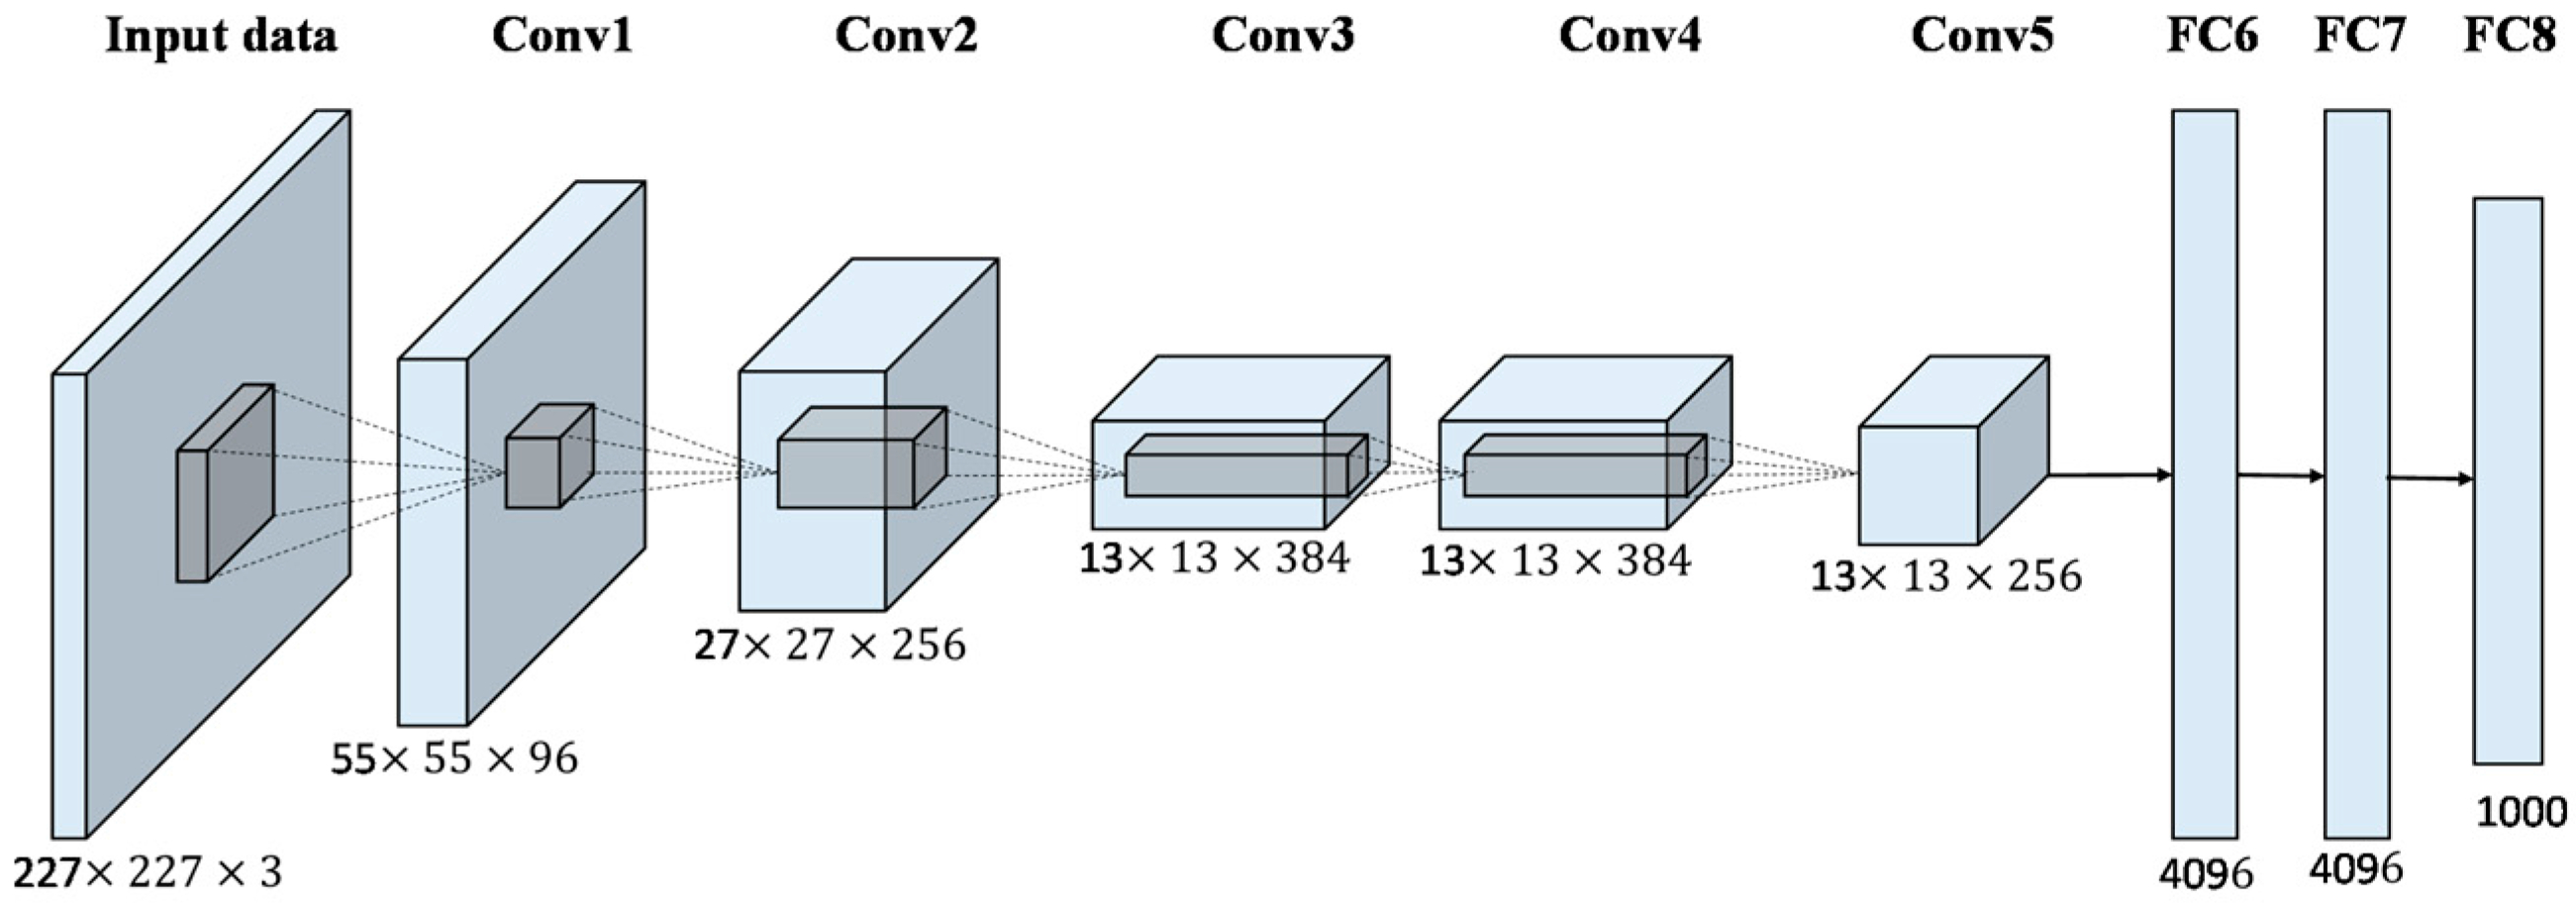

---

The first new architecture that we tested was the **VGG-16** architecture. This architecture looks a lot like the AlexNet architecture, there are only some small differences in the size of the convolutional layers. The output size of these layers is 7 * 7 * 512. Which is bigger, the expected obtained accuracy was higher than the AlexNet, since there is more information tranferred to the fully connected layers, 63% more. After training for about 20 hours until the loss becomed stable, the results are as follow :  

*  Accuracy : 0.36
*  Accuracy with non-zero IoU: 0.51
*  Time per frame: 0.021 second/frame

It was expected to have an accuracy greater than the one in the paper, since VGG16 is supposed to be more perfomant on image classification, so give better extracted features. The training was done until convergence, so the training time shouldn't be a reason. The training dataset might be a reason, our model may not generalize as good as the paper's because our training set was smaller than the paper's. Or the reason can just be that VGG16 isn't fitted for this type of problem. 

---

---


Another analysed architecture was with **ResNet-18** and **ResNet-50**. Those architectures perform very well on image classification tasks, as for VGG16 we expected very good results from it on our model. The particularity for the ResNet networks, is that it uses residual blocs. More precisely the ResNet-50 was expected to work better than the ResNet-18 architecture since it has more layers. After training both for about 20 hours, the loss was of about 120-220, it is much higher than the average training loss of VGG16, namely 35-55. The test results were as follow : 

* Accuracy : 0.03
* Accuracy with non-zero IoU: 0.21
* Time per frame: 0.013 seconds

The accuracies on the test data, were like the one on the training data, very poor. We think that this model is unable to learn information about the position of the object. These results aren't 0, just because the bounding box may sometimes randomly pass over the GT bounding box. We "think" that a reason for that can be found in the architecture of the ResNet networks. Usually for image classification architectures, there are first convolutional layers that perform feature extraction. The convolutional layers are followed by several fully connected layers, in the AlexNet for example has three FCL. The Resnet only has 1 fully connected layer. This means that the features that are passed to the FCL are already processed, in order to do classification. Morover the input size of the FCL is 1024 and the outputsize is 1000. Such a small ration input/output shows that the input features only contain information about the image class. No other information about the context or surroundings is passed, which made it very difficult to the model to learn things about position of objects. 


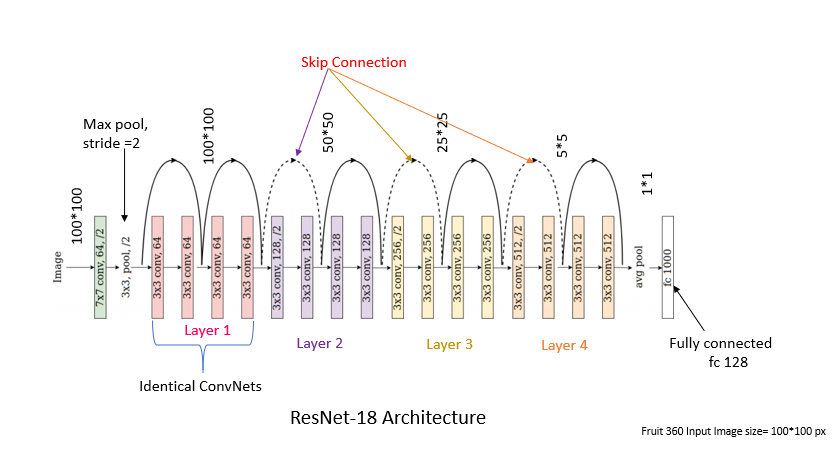

---
---

The next network that is analysed, is the **MobileNet V2**. This model is in litterature often used for object detection , it has good performances and is suitable for mobile devices. It can easily run at 240 frames per second on an [iPhone X](https://machinethink.net/faster-neural-networks/). With the MobileNet V2 we try to achieve a faster network while having better results, than the paper's architecture. The output size of the convolutional layers of this network is 1280 * 7 * 7, those are then flattened before passing through the fully connected layers. After around 20 hours of training the results of this architecture were promissing : 


*  Accuracy : 0.46
*  Accuracy with non-zero IoU: 0.55
*  Time per frame: 0.020 second/frame

The accuracy are better than the paper's one (0.39) ! 

The speed of the network is worse than the one for alexnet, even if we know that alexnet is a much slower network than MobileNet. This may be because of the size of the first fully connected layer. The first fully connected layer with alexnet has as an input size of 6 * 6 * 256 * 2 and an output of 4096, this makes a total of 75 million weights. But it is nothing compared with the MobileNet, input size:  1280 * 7 * 7 * 2 and output size: 4096, this makes a total of 513 million weights. This huge difference might explain the different execution times. 

We explained that the bad results for the Resnet50 architecture was due to the fact that there was only one fully connected layer after the convolutional layers, when used for image classification. We argued that it meant that very little information was passed, apart of the objects label. For the MobileNet v2 there is also only one fully connected layer after the convolution layers. But the difference here is that the size of the output of the convolutinal layers of the MobileNet v2 is of 7 * 7 * 1280, compared to 2*512. This means that much more information is transfered, not only about the object's type. We think that this is the reason that explains the difference in performances between the Resnets and the MobileNet v2. 
 


---
---
Finally a last network has been analysed namely the **mnasnet0.5**. This architecture has been chosen to perform better than the MobileNetV2, because it's classification performances are better and the latency is [1.8 times ](https://openaccess.thecvf.com/content_CVPR_2019/papers/Tan_MnasNet_Platform-Aware_Neural_Architecture_Search_for_Mobile_CVPR_2019_paper.pdf)faster. The model has been trained for around 16 hours until the losses were stable.

*  Accuracy: 0.52
*  Accuracy with non-zero IoU: 0.61
*  Time per frame: 0.14 seconds

The results in accuracy are better than the MobileNetV2 and much better than the AlexNet! 

The reduced latency time compared to the model with MobileNetV2, is explained by the smaller latency time. But still it has the same slow down as MobileNetv2, due to the big output size of the Mnasnet0.5. 

--- 
---
---
We achieved a better accuracy with the Mnasnet0.5, but still we don't have a faster model. We noticed that the speed of the model decreased with the amount of weights in the first fully connected layer. A proof may be to notice that in theory the AlexNet is [faster](https://openreview.net/pdf?id=Bygq-H9eg&source=post_page---------------------------) than the Resnet50, but for here in object detection the architecture with both of them is quite the same. This is due to the fact that the size of the first FCL, with resnet50, is much smaller than the one with alexnet. 

We tried to solve this by decreasing the amount of parameters of the FCL by using a sort of **"[Group](https://www.researchgate.net/figure/Illustration-of-a-a-fully-connected-layer-b-group-connected-layer-c-our_fig1_343096380) connected layer"**. Usually this technique isn't used often in litterature, but we wanted to try it out. 

For the first part of the experiment, we used 20 groups, which divided the amount of weights for the first fully connected layer by 20, namely 25 million. We thought that all the output features did't had to be connected with each other, and if they had to, there would have been the second FCL layer would make them to do so. 
The model was trained for about 10 hours, but it wasn't obtain good results at all. While testing we noticed that he just created huge bounding boxes, so the GT boundind box would find itself in it. 

We thought that the model was soo bad because the output features weren't able to communicate with each other at a higher stage. This is why we added a FCL of input and output size 4096, wich made a total of 4 FCL in the network. The results of this new network were also bad. This shows us how much the output nodes of the convolutions rely on each other. 

For these last two experiments we expected the computation time per frame would decrease with fewer weights, we actually increased it to around 0.025 seconds/frame. This wasn't expected. But actually it seems logic, by looking at the values of the weights. Even if the normal FCL had much more weights, there were much more weights that were equal to 0. The pytorch linear layers might then have an efficient way of calculating the forward pass when dealing with weights of 0.  

Since there are a lot of zeros in the first FCL, **network pruning** might be a good solution to reduce the number of weights, thus increase the speed of the model. 


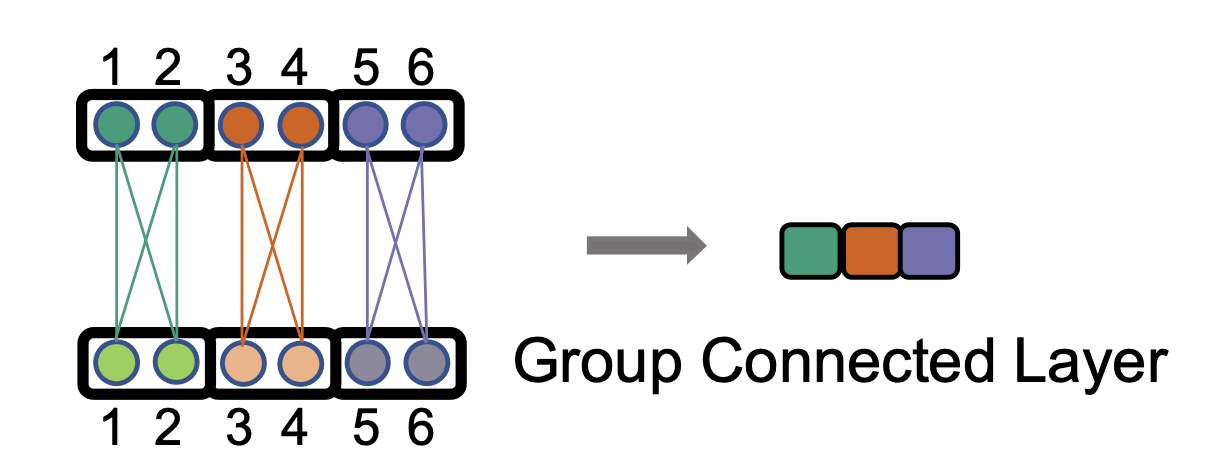

---
---
---
Another improvement that we want to try in order to increase the accuracy of the model would be adding a frame that represents the **cross correlation** between the first and the second frame. We believed that cross correlation between the two frame was able to represent displacement between the two frames. The cross correlation would then pass through the untrained alexnet, in order to find patterns and be able to discern for example the movements of the object, the background or the camera. Unfortunately we noticed that after 20 hours the model was converging very very slowly. This was probably not due to the architecture, but on the fact that the alexnet had to be trained again from scratch. This would have taken days or week if we wanted to wait convergence. The idea was then abandonned due to the training time. But in future research it might be interesting to try it. 

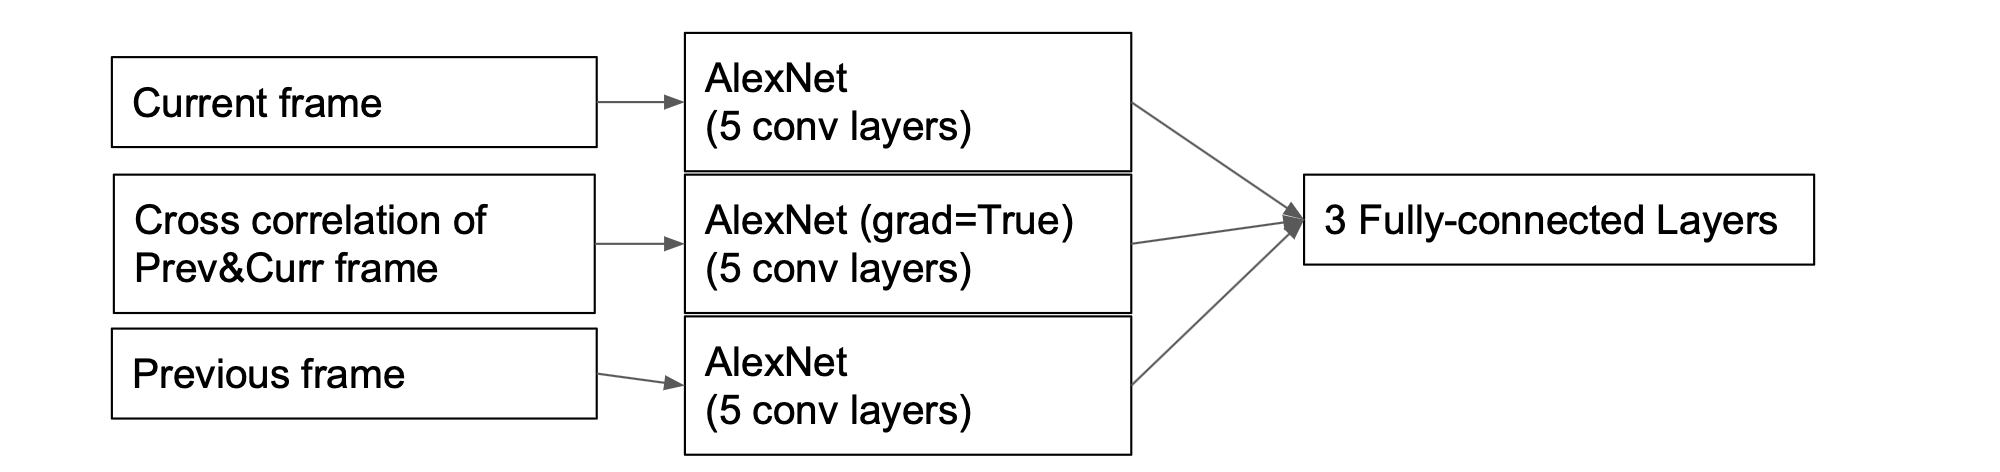

# Loss functions


Yigens part about loss functions

In the ablative analysis section of paper [reference], it can be seen that the overall error caused by the loss function is the largest, which represents that the loss function has a very important influence on the over performance of the whole network structure, including accuracy and robustness. In the paper, the authors only compared the L1 loss function and the L2 loss function. But the loss function of bounding box has been improved a lot recently. Thus, it has indeed meaning to evaluate different loss functions. Its evolution route is L1/L2 loss -> smooth L1 loss → IOU loss → GIou loss → DIou loss → CIou loss. This section explains and implement it according to this route.

L1 loss function and L2 loss function are the one of the earliest loss function for localization. They have the following forms and derivations. 

$$L_1 loss = |x|, \frac{dL_1(x)}{x}=\begin{cases}
1, \quad x \geq 0\\
0, \quad x < 0\\
\end{cases}$$ 
$$L_2 loss= x^2, \frac{dL_2(x)}{x}=2x$$

In the previous bounding box regression, L1 and L2 loss are often used, but there are existing some disadvantages of them. The derivative of L1 loss to $x$ is constant. Because $x$ represents the difference between the real value and the predicted value, if the learning rate remains unchanged, the loss function will fluctuate near the stable value and it is difficult to converge to a higher accuracy in the later stage of training. For L2 loss, when the $x$ value of L2 loss is large, its derivative is very large, so it is unstable at the beginning of training. Thus, the bad result of L2 loss the authors got in the paper is probably because their tracking network or the boudning box regression have weak robustness for large loss. So, we choose L1 loss as the baseline in this section and the following figure trained on ALOV300++ dataset the shows the L1 loss curve.

![L1_10000.png](./images/L1_10000.png)
<center>L1 loss curve with 10000 iterations</center>

Aiming at the shortcomings of L1/L2 loss, smooth L1 is obtained after correction with the following forms [Fast r-cnn] 

$$smooth_{L_1}(x) = \begin{cases}
0.5x^2, \quad if |x|<1\\
|x| - 0.5, \quad otherwise\\
\end{cases}$$
$$\frac{d_{smooth_{L_1}(x)}}{x}=\begin{cases}
x, \quad if|x|<1\\
\pm\ 1, \quad otherwise
\end{cases}$$

According to the above forms, it can be known that $smooth_{L_1}$ is L2 loss when $x$ is relatively large, while it is L1 loss when $x$ is relatively small. However, all the above three loss calcuate the loss of 4 points independently and then the final bbox loss is obtained by adding when they calculate the bbox loss of object tracking, which does not conform to the reality. Futhermore, the evaluation index of bbox in object tracking is IoU, which does not match the change of the above losses. The following figure training on ALOV300++ dataset the shows the SmoothL1 loss curve.

![SmoothL1_10000.png](./images/SmoothL1_10000.png)
<center>SmoothL1 loss curve with 10000 iterations</center>

Also, aiming at the shortcomings of SmoothL1 loss, IoU loss is defined as follows.

$$IoU loss = -ln IoU(bbox_{gt}, bbox_{pred})$$

or even simplify as

$$IoU loss = 1 - IoU(bbox_{gt}, bbox_{pred})$$

The biggest improvement of IoU loss calculation is that it makes x, y, w, h interrelated, and has  scale invariance, which overcomes the shortcomings of SmoothL1 loss. However, IoU loss is not perfect either. When $IoU=0$, it can not reflect the distance between the two frames, so the loss function is not differentiable and IoU loss can not optimize the situation of two bbox disjoint. Moreover, assuming that the sizes of the prediction box and the target box are determined, as long as the intersection values of the two boxes are determined and their IoU values are the same, the IoU value can not reflect how the two boxes intersect. The following figure trained on ALOV300++ dataset the shows the IoU loss curve.

![IoU_10000.png](./images/IoU_10000.png)
<center>IoU loss curve with 10000 iterations</center>

In order to solve the problem that IoU can not distinguish some intersecting cases. Thus, paper proposed GIoU as the measurement index [Generalized intersection over union: A metric and a loss for bounding box regression]. 

$$GIoU=IoU-\frac{|C-(A \cup\ B)|}{|C|}$$

where $C$ is the circumscribed rectangle of $A$ and $B$. Subtract the union of a and $B$ by $C$ to get a value, and then subtract the IOU of $A$ and $B$ to get the giou value. It can be seen that:

The range of giou is $[- 1,1]$, the maximum value is $1$ when the two frames overlap, and the minimum value is $- 1$ when the two frames are infinite;

Different from IoU only focusing on overlapping areas, giou not only focuses on overlapping areas, but also focuses on other non overlapping areas, which can better reflect the coincidence degree of the two.

Similarly to IoU loss, GIoU can be defined as:

$$GIoU loss = 1 - GIoU$$

However, when the prediction box is completely wrapped by the target box, the values of IoU and GIoU are the same. At this time, GIoU degenerates to IoU and its relative position cannot be distinguished. The following figure trained on ALOV300++ dataset the shows the IoU loss curve.

![GIoU_loss.png](./images/GIoU_loss.png)
<center>GIoU loss curve with 60000 iterations</center>

To solve the shortcomings of IoU loss and GIoU loss, three important geometrci factors of bounding box regression, overlapping area, center distance and aspect ratio are proposed [reference: Distance-IoU Loss: Faster and Better Learning for Bounding Box Regression]. DIoU is to add the normalized distance of the center point on the basis of IoU, so it can better express the distance between two boxes. The penalty is set as:

$$R_{DIoU}= \frac{\rho ^2(b_{pred},b_{gt})}{c^2}$$

where $b_{pred}$ and $b_{gt}$ indicate the center point of bounding box, and $\rho$ represent the Euclidean distance, $c$ is the diagonal distance of the smallest circumscribed rectangle. Therefore, DIoU loss is defined as:

$$DIoU loss =1 - IoU +R_{DIoU}$$

However, DIoU does not contain the aspect ratio. The following figure trained on ALOV300++ dataset the shows the IoU loss curve.

![DIoU_loss.png](./images/DIoU_loss.png)
<center>DIoU loss curve with 10000 iterations</center>

So CIoU adds the aspect ratio influence factor $\alpha v$ and combines it to the penalty [reference: Distance-IoU Loss: Faster and Better Learning for Bounding Box Regression], based on DIoU. 

$$R_{CIoU} = \frac{\rho ^2(b_{pred},b_{gt})}{c^2} + \alpha v$$

where $v$ is used to measure the consistency of the aspect ratio, and $\alpha$  is used to balance the value $v$, which are set as:

$$\alpha = \frac{v}{(1-IoU)+v}$$
$$v = \frac{4}{\pi ^2}(arctan \frac{w^{gt}}{h^gt} -arctan \frac{w}{h})^2$$

Therefore, CIoU loss is defined as:

$$CIoU loss = 1- IoU +R_{CIoU}$$

However, $v$ is too complicated to measure the aspect ratio, which slows down the convergence rate. Moreover, we also find the loss collapse during training. The following two figures trained on ALOV300++ dataset the show the IoU loss curve and loss collapse.

![CIoU_loss.png](./images/CIoU_loss.png)
<center>CIoU loss curve with 10000 iterations</center>

![CIoU_loss_3.png](./images/CIoU_loss_3.png)
<center>CIoU loss collapse</center>

To test the performance of different loss functions, we implement the above loss functions with several numbers of iterations on eight randomly selected class datasets, including Boy, Car, Basketball, Bird, Bolt, Skiing, Girl, Couple. The following figure shows the average IoU accuracy of different loss functions with different iterations on eight class datasets.

![loss_function.png](./images/loss_function.png)
<center>The average IoU accuracy of six loss functions with different iterations on eight class datasets</center>

Obviously, SmoothL1 loss and CIoU loss have the worst performance among these eight class datasets. For SmoothL1 loss, we can see that it fails to converge quickly in the early stage, which should be its advantage compared with L1 loss. Besides, the final IoU accracy of it has a considerable gap with L1 loss. Apart from L1 loss, CIoU loss shows large convergence instability and also obsessed with loss collapse problem on the training dataset. Thus, it also should not be considered as a good loss function on this blog. Furthermore, DIoU loss has neither the fastest convergency rate and the stable convergency of GIoU loss, nor the highest IoU accuracy of L1 loss, nor the best overall performance of IoU loss. Thus, the relatively best loss functions are only L1 loss, IoU loss, and GIoU loss, which are worth further study. In the following figures, we show a random pair of two frames on Girl test dataset for every loss functions with 20000 iterations, except CIoU loss with 8000 iterations. The white bounding box is the ground truth bounding box, while the red one is the prediction bounding box.

<div class="div_1" style='text-align:center'> <div style="display:inline-block"><img src="./images/422_L1.jpg"  width="200" height="260" ></div>
<div style="display:inline-block"><img src="./images/423_L1.jpg" width="200" height="260" ></div>
    <center>The pair frames of L1 loss with 20000 iterations</center>

<div class="div_1" style='text-align:center'> <div style="display:inline-block"><img src="./images/422_SmoothL1.jpg"  width="200" height="260" ></div>
<div style="display:inline-block"><img src="./images/423_SmoothL1.jpg" width="200" height="260" ></div>
    <center>The pair frames of SmoothL1 loss with 20000 iterations</center>

<div class="div_1" style='text-align:center'> <div style="display:inline-block"><img src="./images/422_IoU.jpg"  width="200" height="260" ></div>
<div style="display:inline-block"><img src="./images/423_IoU.jpg" width="200" height="260" ></div>
    <center>The pair frames of IoU loss with 20000 iterations</center>
    
<div class="div_1" style='text-align:center'> <div style="display:inline-block"><img src="./images/422_GIoU.jpg"  width="200" height="260" ></div>
<div style="display:inline-block"><img src="./images/423_GIoU.jpg" width="200" height="260" ></div>
    <center>The pair frames of GIoU loss with 20000 iterations</center>
    
<div class="div_1" style='text-align:center'> <div style="display:inline-block"><img src="./images/422_DIoU.jpg"  width="200" height="260" ></div>
<div style="display:inline-block"><img src="./images/423_DIoU.jpg" width="200" height="260" ></div>
    <center>The pair frames of DIoU loss with 20000 iterations</center>
 
<div class="div_1" style='text-align:center'> <div style="display:inline-block"><img src="./images/422_CIoU.jpg"  width="200" height="260" ></div>
<div style="display:inline-block"><img src="./images/423_CIoU.jpg" width="200" height="260" ></div>
    <center>The pair frames of CIoU loss with 8000 iterations</center>

# Combined 



AYMAR implements and does the training of the best loss function with the best pretrained model

YGEN does the result video with the different frames 

# Conclusion

Ygen

# Contributions

Usefull links:
https://cv-tricks.com/keras/understand-implement-resnets/

# CODE FOR REPRODUCTION


A connection to the account of aymdeberg@gmail.com needs to be done before doing anything, because the data and the pretrained models are needed in order to the tests, training... Then depending on the version of the model you want to train, evaluate or demonstrate you need to change the github code accoringly. The github code can be found for aymar's part here: https://github.com/debrouchovea/ReproduceGoturn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For **training** you need to be sure that the pretrained model you use is already implemented on github (just need to change the comments in the file)

In [ ]:
!git clone https://github.com/debrouchovea/ReproduceGoturn.git
!python ReproduceGoturn/src/train.py  -d '/content/drive/My Drive/Goturnreproduce/data/' --save-freq 5000 -s '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnetv3/'

Cloning into 'ReproduceGoturn'...
remote: Enumerating objects: 935, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 935 (delta 207), reused 182 (delta 106), pack-reused 651
Receiving objects: 100% (935/935), 30.34 MiB | 21.66 MiB/s, done.
Resolving deltas: 100% (491/491), done.
Namespace(batch_size=50, data_directory='/content/drive/My Drive/Goturnreproduce/data/', gamma=0.1, lambda_scale_frac=15, lambda_shift_frac=5, learning_rate=1e-05, lr_decay_step=100000, manual_seed=800, max_scale=0.4, min_scale=-0.4, momentum=0.9, num_batches=500000, resume='', save_directory='/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnetv3/', save_freq=5000, weight_decay=0.0005)
Parsing ALOV dataset...
ALOV dataset parsing done.
Total number of annotations in ALOV dataset = 15877
Downloading: "https://download.pytorch.org/models/mnasnet0.5_top1_67.823-3ffadce67e.pth" to /root/.cache/torch/hub/checkpoints/mnasnet0.5_top1_67.823-

To **evaluate the speed** of an iteration per frame you need to run the code below. The results can be found in the folder 'Goturnreproduce/ *name of model* results'. If you want to change the tested model path, or result saving path you need to change the repistory accoringly in the evaluate.py on github. 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib notebook
!pip install --upgrade got10k
!git clone https://github.com/debrouchovea/ReproduceGoturn.git
!python ReproduceGoturn/src/evaluate.py

     |████████████████████████████████| 92kB 4.5MB/s 
  Created wheel for got10k: filename=got10k-0.1.3-cp37-none-any.whl size=43872 sha256=849d589c8d2d425eafc433bc4d46603eed21e6a68f3a5403e97db4649302b645
  Stored in directory: /root/.cache/pip/wheels/cb/36/bd/54cd9e22399af8d88950ca26216b7293e5f1ce69322accb6fd
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=c0ec6e09368eac7dffc9c914c3f3c7958ad80235d6aaebcbee643b719f7cbfa3
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=52a465205261929f310c7e59cb078a5353274b08418b3b145bcf5551dde8c9e6
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built got10k fire wget
fatal: destination path 'ReproduceGoturn' already exists and is not an empty directory.
tcmalloc: large alloc 2055208960 bytes == 0x5610541c600

In order to **test** the accuracy of a model, the github code needs first to be ajusted to the model you want to train. And then the pretrained version of the chosen accordingly. 

In [ ]:
!git clone https://github.com/debrouchovea/ReproduceGoturn.git
print('Basketball')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Basketball' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Bolt')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Bolt' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Boy')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Boy' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Car4')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Car4' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('CarDark')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/CarDark' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('CarScale')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/CarScale' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Coke')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Coke' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Couple')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Couple' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Crossing')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Crossing' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('David')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/David' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('David2')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/David2' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('David3')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/David3' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Deer')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Deer' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Dog1')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Dog1' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Doll')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Doll' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Dudek')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Dudek' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('FaceOcc1')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/FaceOcc1' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('FaceOcc2')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/FaceOcc2' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'


fatal: destination path 'ReproduceGoturn' already exists and is not an empty directory.
Basketball
tcmalloc: large alloc 2055208960 bytes == 0x55aed2804000 @  0x7f40538cfb6b 0x7f40538ef379 0x7f3ffffe825e 0x7f3ffffe99d2 0x7f403cccc8e6 0x7f403d12edd9 0x7f403d63977a 0x7f403d604ef9 0x7f403d5bb657 0x7f403d45f929 0x7f404ee2bc07 0x7f404ee2d584 0x7f404ebd7d0a 0x55aecd613c65 0x55aecd5d4462 0x55aecd647fd5 0x55aecd6427ad 0x55aecd5d5a81 0x55aecd616d79 0x55aecd613cc4 0x55aecd5d4462 0x55aecd647fd5 0x55aecd6427ad 0x55aecd5d5a81 0x55aecd616d79 0x55aecd613cc4 0x55aecd5d4462 0x55aecd647715 0x55aecd6427ad 0x55aecd5d5a81 0x55aecd616d79
tcmalloc: large alloc 2055208960 bytes == 0x55af55020000 @  0x7f40538cfb6b 0x7f40538ef379 0x7f3ffffe825e 0x7f3ffffe99d2 0x7f403e012e7d 0x7f404ec0d120 0x7f404e84bbd9 0x55aecd5d48a8 0x55aecd647fd5 0x55aecd6427ad 0x55aecd5d53ea 0x55aecd6433b5 0x55aecd6427ad 0x55aecd5d5003 0x55aecd5d4b09 0x55aecd71c28d 0x55aecd68b1db 0x55aecd5d3bb1 0x55aecd6c4fed 0x55aecd647988 0x55aecd6427ad 0